## Exploratory Data Analysis: alarms dataset 

In [67]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

### Read 1st .csv file and write it to *df_regions* dataframe (regions data)

In [27]:
df_regions = pd.read_csv("regions.csv", sep=",")
region_list=list(df_regions["region_alt"])
df_regions.head()
#region_list

,region,center_city_ua,center_city_en,region_alt,region_id
0,АР Крим,Сімферополь,Simferopol,Крим,1
1,Вінницька,Вінниця,Vinnytsia,Вінниччина,2
2,Волинська,Луцьк,Lutsk,Волинь,3
3,Дніпропетровська,Дніпро,Dnipro,Дніпропетровщина,4
4,Донецька,Донецьк,Donetsk,Донеччина,5


### Read 2nd .csv file and write it to *df* dataframe (alarms data)

In [28]:
df = pd.read_csv("alarms.csv", sep=";")

df.head()

,id,region_id,region_title,region_city,all_region,start,end,clean_end,intersection_alarm_id
0,2,3,Вінниччина,Вінниця,0,2022-02-25 22:55:42,2022-02-25 23:41:53,2022-02-25 23:41:53,NaN
1,4,12,Львівщина,Львів,0,2022-02-26 06:26:17,2022-02-26 07:15:28,2022-02-26 07:15:28,NaN
2,5,14,Одещина,Одеса,0,2022-02-26 07:16:58,2022-02-26 07:47:03,2022-02-26 07:47:03,NaN
3,6,6,Житомирщина,Житомир,0,2022-02-26 08:05:54,2022-02-26 09:36:36,2022-02-26 09:36:36,NaN
4,7,3,Вінниччина,Вінниця,0,2022-02-26 08:39:39,2022-02-26 10:42:41,2022-02-26 10:42:41,NaN


### Add a new column "date"

In [29]:
data_list=[]

for i in range(len(df)):
    temp=df["start"].iloc[i].split(" ")
    data_list.append(temp[0])
    
df['date']=data_list
    

df

,id,region_id,region_title,region_city,all_region,start,end,clean_end,intersection_alarm_id,date
0,2,3,Вінниччина,Вінниця,0,2022-02-25 22:55:42,2022-02-25 23:41:53,2022-02-25 23:41:53,NaN,2022-02-25
1,4,12,Львівщина,Львів,0,2022-02-26 06:26:17,2022-02-26 07:15:28,2022-02-26 07:15:28,NaN,2022-02-26
2,5,14,Одещина,Одеса,0,2022-02-26 07:16:58,2022-02-26 07:47:03,2022-02-26 07:47:03,NaN,2022-02-26
3,6,6,Житомирщина,Житомир,0,2022-02-26 08:05:54,2022-02-26 09:36:36,2022-02-26 09:36:36,NaN,2022-02-26
4,7,3,Вінниччина,Вінниця,0,2022-02-26 08:39:39,2022-02-26 10:42:41,2022-02-26 10:42:41,NaN,2022-02-26
...,...,...,...,...,...,...,...,...,...,...
19928,47472,5,️Донеччина,Донецька обл.,1,2023-01-20 22:39:41,2023-01-20 23:18:12,2023-01-20 23:18:12,NaN,2023-01-20
19929,47532,19,Харківщина,Харківська обл.,1,2023-01-20 22:39:52,2023-01-20 23:17:36,2023-01-20 23:17:36,NaN,2023-01-20
19930,47513,15,Полтавщина,Полтавська обл.,1,2023-01-20 22:44:30,2023-01-20 23:17:22,2023-01-20 23:17:22,NaN,2023-01-20
19931,47520,17,Сумщина,Сумська обл.,1,2023-01-20 22:47:57,2023-01-20 23:22:34,2023-01-20 23:22:34,NaN,2023-01-20


In [30]:
df.describe()

,id,region_id,all_region,intersection_alarm_id
count,19933.000000,19933.000000,19933.000000,2098.000000
mean,19504.320925,11.159785,0.696283,14686.461868
std,14872.354802,6.374564,0.459874,12632.068063
min,1.000000,1.000000,0.000000,45.000000
25%,5106.000000,5.000000,0.000000,3826.500000
50%,17421.000000,10.000000,1.000000,10473.000000
75%,32528.000000,17.000000,1.000000,22397.000000
max,47547.000000,24.000000,1.000000,47488.000000


### Count number of alarms for each region

In [31]:
# df['region_id'].plot.hist(color = 'blue', edgecolor = 'black')
# plt.ylabel('regions')
# plt.xlabel('amount of alarms');

### Create a new dictinary for number of alarms per region (when alarm is in whole region)

In [74]:
alarms_region={}


for i in range(len(region_list)):
    alarms_region[region_list[i]]=[region_list[i],len(df[(df['region_title']==region_list[i]) & (df['all_region']==1)])]

    
print(alarms_region)

{'Крим': ['Крим', 0], 'Вінниччина': ['Вінниччина', 431], 'Волинь': ['Волинь', 328], 'Дніпропетровщина': ['Дніпропетровщина', 1203], 'Донеччина': ['Донеччина', 0], 'Житомирщина': ['Житомирщина', 448], 'Закарпаття': ['Закарпаття', 210], 'Запоріжжя': ['Запоріжжя', 1275], 'Івано-Франківщина': ['Івано-Франківщина', 249], 'Київщина': ['Київщина', 496], 'Кіровоградщина': ['Кіровоградщина', 790], 'Луганщина': ['Луганщина', 0], 'Львівщина': ['Львівщина', 240], 'Миколаївщина': ['Миколаївщина', 877], 'Одещина': ['Одещина', 553], 'Полтавщина': ['Полтавщина', 816], 'Рівненщина': ['Рівненщина', 310], 'Сумщина': ['Сумщина', 552], 'Тернопільщина': ['Тернопільщина', 287], 'Харківщина': ['Харківщина', 1527], 'Херсонщина': ['Херсонщина', 367], 'Хмельниччина': ['Хмельниччина', 283], 'Черкащина': ['Черкащина', 647], 'Буковина': ['Буковина', 223], 'Чернігівщина': ['Чернігівщина', 433]}


### Create a plot representing the total number of alarms in every region for the whole researched period

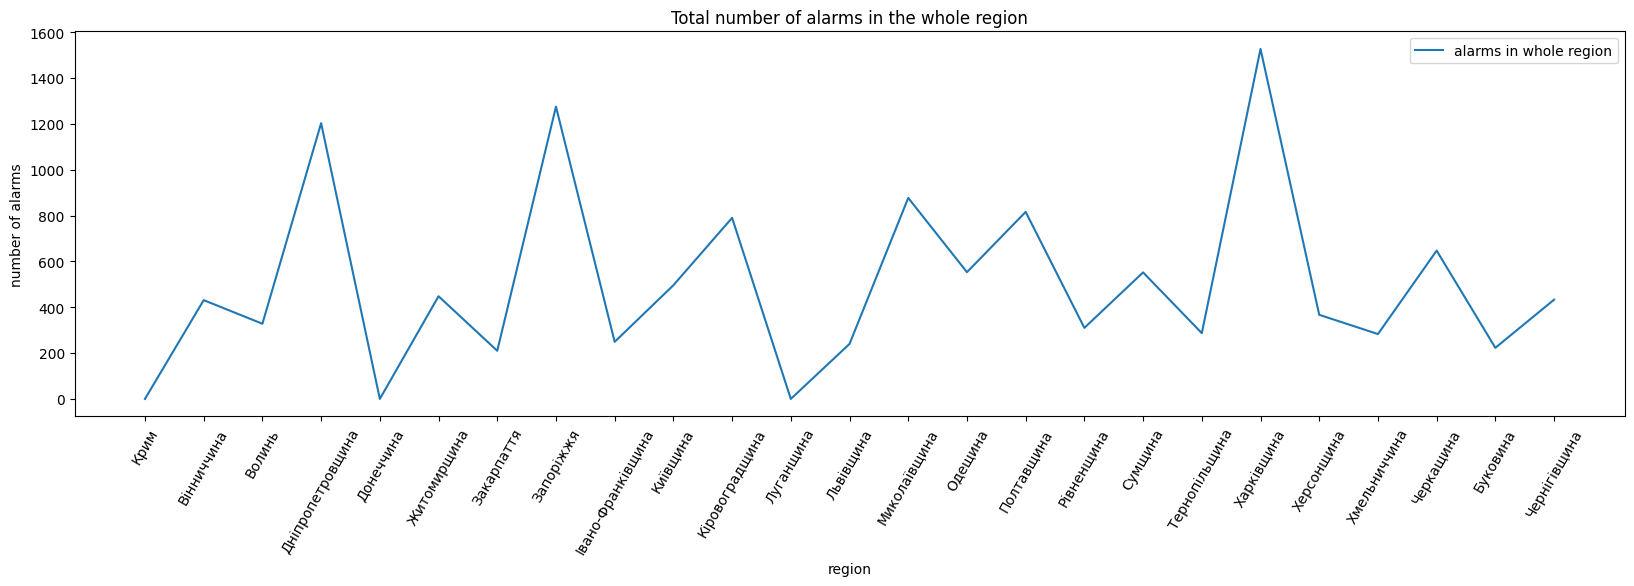

In [101]:

alarm=pd.DataFrame.from_dict(alarms_region, orient='index', columns=['region','number alarms'])
alarm1=list(alarm["number alarms"])

plt.figure(figsize = (20,5))

plt.plot(region_list, alarm1, label = "alarms in whole region")
plt.xticks(rotation = 60)
plt.title('Total number of alarms in the whole region')
plt.xlabel('region')
plt.ylabel('number of alarms')

plt.legend()
plt.show()



### Create a new dictinary for number of alarms per region (when alarm is in part of the region)

In [76]:
alarms_region_list={}


for i in range(len(region_list)):
    alarms_region_list[region_list[i]]=[region_list[i],len(df[(df['region_title']==region_list[i]) & (df['all_region']==0)])]

    
print(alarms_region_list)

{'Крим': ['Крим', 0], 'Вінниччина': ['Вінниччина', 83], 'Волинь': ['Волинь', 15], 'Дніпропетровщина': ['Дніпропетровщина', 388], 'Донеччина': ['Донеччина', 0], 'Житомирщина': ['Житомирщина', 262], 'Закарпаття': ['Закарпаття', 0], 'Запоріжжя': ['Запоріжжя', 60], 'Івано-Франківщина': ['Івано-Франківщина', 28], 'Київщина': ['Київщина', 1044], 'Кіровоградщина': ['Кіровоградщина', 322], 'Луганщина': ['Луганщина', 0], 'Львівщина': ['Львівщина', 39], 'Миколаївщина': ['Миколаївщина', 659], 'Одещина': ['Одещина', 135], 'Полтавщина': ['Полтавщина', 163], 'Рівненщина': ['Рівненщина', 16], 'Сумщина': ['Сумщина', 94], 'Тернопільщина': ['Тернопільщина', 8], 'Харківщина': ['Харківщина', 92], 'Херсонщина': ['Херсонщина', 0], 'Хмельниччина': ['Хмельниччина', 161], 'Черкащина': ['Черкащина', 137], 'Буковина': ['Буковина', 2], 'Чернігівщина': ['Чернігівщина', 190]}


### Create a plot representing the total number of alarms in a *part* of each region for the whole researched period

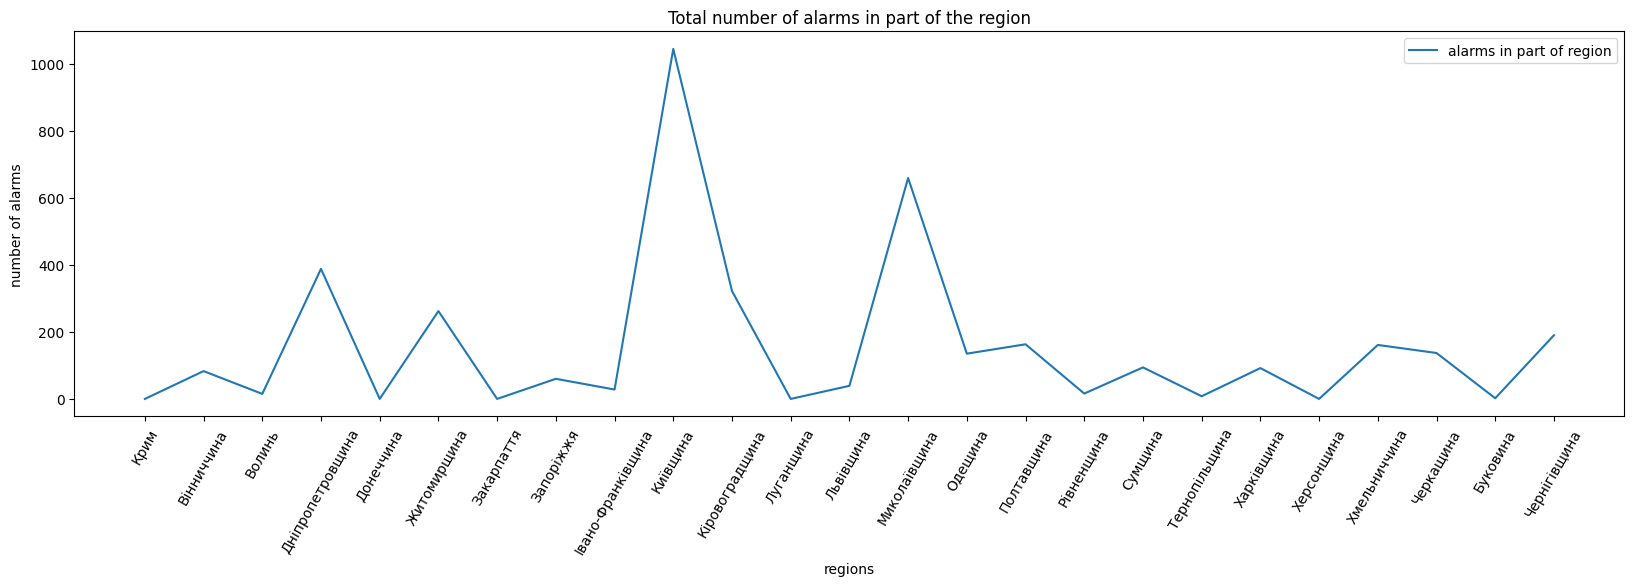

In [100]:
alarm=pd.DataFrame.from_dict(alarms_region_list, orient='index', columns=['region','number alarms'])
alarm1=list(alarm["number alarms"])

plt.figure(figsize = (20,5))

plt.plot(region_list, alarm1, label = "alarms in part of region")
plt.xticks(rotation = 60)
plt.title('Total number of alarms in part of the region')
plt.xlabel('regions')
plt.ylabel('number of alarms')

plt.legend()
plt.show()




### Create a plot to compare two previous ones

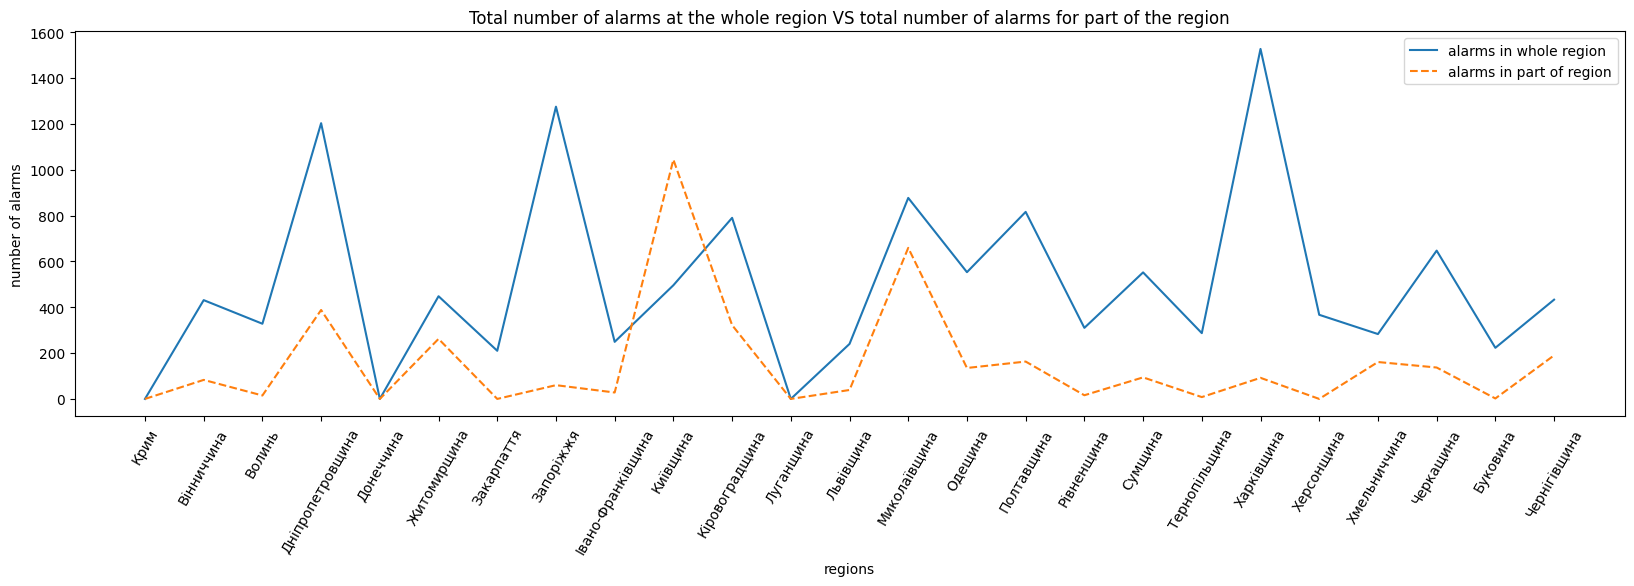

In [98]:
alarm=pd.DataFrame.from_dict(alarms_region, orient='index', columns=['region','number alarms'])
alarm1=list(alarm["number alarms"])
alarm=pd.DataFrame.from_dict(alarms_region_list, orient='index', columns=['region','number alarms'])
alarm2=list(alarm["number alarms"])

#region_list=list(df_regions["region_alt"])
plt.figure(figsize = (20,5))
plt.plot(region_list, alarm1, label = "alarms in whole region", linestyle="-")
plt.plot(region_list, alarm2, label = "alarms in part of region", linestyle="--")
plt.xticks(rotation = 60)
plt.title('Total number of alarms at the whole region VS total number of alarms for part of the region')
plt.xlabel('regions')
plt.ylabel('number of alarms')


plt.legend()
plt.show()


